In [1]:
%load_ext autoreload
%autoreload 2

from ivlib.utils import *
from modelsimu import *
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
margins_begone()

In [3]:
m = Model()

In [4]:
m.parameters = {'beta':0.4, 'gamma':0.067}
m.states = [
    ["Susceptible", 10000,  (1.0, 1.0, 0.3)],
    ["Infectious",  100,    (1.0, 0.3, 0.3)],
    ["Recovered",   0,      (0.3, 1.0, 0.3)],
]
m.transitions = [
    [0,1, lambda s,i,r,beta:beta*s*i/(s+i+r), [0,1,2,'beta'] ],
    [1,2, lambda i,gamma:gamma*i, [1,'gamma']]
]
m.layout = [
    [0,0],
    [0, 1],
    [0, 2]
]

In [5]:
[x[0] for x in m.states]

['Susceptible', 'Infectious', 'Recovered']

In [6]:
labels = [x[0] for x in m.states]
labels += [m.states[t[0]][0]+" to "+m.states[t[1]][0] for t in m.transitions]

In [7]:
f = m.run(pandas=True)

In [8]:
f

,Susceptible,Infectious,Recovered,Susceptible to Infectious,Infectious to Recovered
0,9960.396040,130.250495,9.353465,39.603960,9.353465
1,9909.015980,169.461308,21.522713,51.380060,12.169247
2,9842.513215,220.154480,37.332305,66.502765,15.809593
3,9756.696448,285.471173,57.832379,85.816767,20.500074
4,9646.389296,369.261177,84.349527,110.307152,26.517148
5,9505.318521,476.139712,118.541768,141.070775,34.192241
6,9326.076556,611.471105,162.452340,179.241965,43.910572
7,9100.229968,781.217407,218.552625,225.846587,56.100285
8,8818.675194,991.566445,289.758361,281.554774,71.205736
9,8472.366187,1248.237796,379.396017,346.309006,89.637655


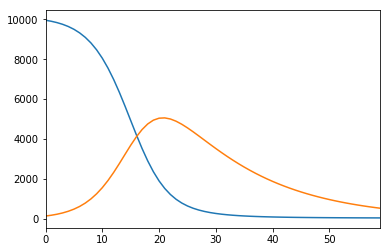

In [9]:
f['Susceptible'].plot()
f['Infectious'].plot()

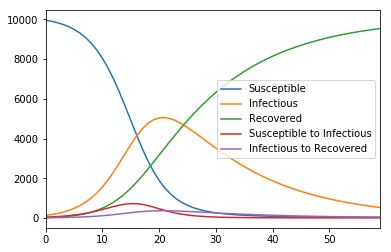

In [10]:
f.plot()

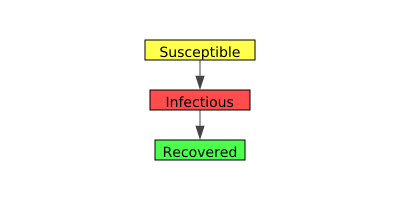

In [11]:
m.summary()

In [12]:
m2 = Model()
m2.parameters = {'beta':0.4, 'gamma':0.067, 'mort':0.0029/15}
m2.states = [
    ["Susceptible", 10000,  (1.0, 1.0, 0.3)],
    ["Infectious",  100,    (1.0, 0.3, 0.3)],
    ["Recovered",   0,      (0.3, 1.0, 0.3)],
    ["Dead",        0,      (1.0, 0.8, 0.8)]
]
m2.transitions = [
    [0,1, lambda s,i,r,beta:beta*s*i/(s+i+r), [0,1,2,'beta'] ],
    [1,2, lambda i,gamma:gamma*i, [1,'gamma']],
    [1,3, lambda i,mort:mort*i, [1,'mort']],
]
m2.layout = [
    [0,0],
    [0, 1],
    [0, 2],
    [1,2]
]

In [13]:
f=m2.run(pandas=True)

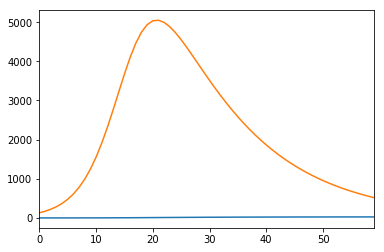

In [183]:
f["Dead"].plot()
f["Infectious"].plot()

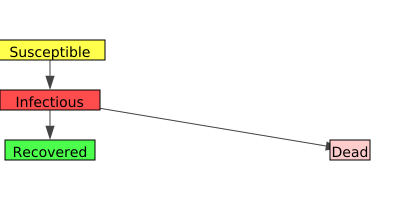

In [184]:
m2.summary()